In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas
!pip install contextily
import contextily
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import geopandas
import numpy

Il Comune di Milano vuole fare un'analisi riguardante le aree di sosta per il parcheggio delle biciclette.
Ha messo a disposizione quindi tre dataset (in allegato) e ha chiesto di avere un report con le seguenti informazioni:

In [ ]:
stradario = pd.read_csv("/content/drive/MyDrive/marieriale geopandas/stradario.csv")
aree_sosta = geopandas.read_file("/content/drive/MyDrive/marieriale geopandas/bike_areesosta.zip")
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")

In [ ]:
stradario

CODICE_VIA AREA DESCRIZIONE_VIA  CIVICO BARRATO  CAP  SEZIONE  MUNICIPIO
0            4377  VIA  8 OTTOBRE 2001      12     NaN  138      916          4
1            3123  VIA     A.DEL SARTO       1     NaN  129      665          3
2            3123  VIA     A.DEL SARTO       3     NaN  129      665          3
3            3123  VIA     A.DEL SARTO       4     NaN  129      665          3
4            3123  VIA     A.DEL SARTO       5     NaN  129      665          3
...           ...  ...             ...     ...     ...  ...      ...        ...
51318        6318  VIA          ZURIGO      24     NaN  147      394          7
51319        6318  VIA          ZURIGO      24       4  147      394          7
51320        6318  VIA          ZURIGO      25     NaN  147     1412          6
51321        6318  VIA          ZURIGO      28     NaN  147      539          7
51322        6318  VIA          ZURIGO      65     NaN  147     1412          6

[51323 rows x 8 columns]

In [ ]:
aree_sosta

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

In [ ]:
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

1. una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
stradario_senza_dop = stradario.drop_duplicates(subset=["CODICE_VIA"])
stradario_senza_dop

CODICE_VIA AREA      DESCRIZIONE_VIA  ...  CAP SEZIONE  MUNICIPIO
0            4377  VIA       8 OTTOBRE 2001  ...  138     916          4
1            3123  VIA          A.DEL SARTO  ...  129     665          3
27           3135  VIA    ABAMONTI GIUSEPPE  ...  129     113          3
30           2558  VIA                ABANO  ...  131    1565          3
41           1295  VIA      ABBA GIUSEPPE C  ...  158    1184          9
...           ...  ...                  ...  ...  ...     ...        ...
51220        5390  VIA              ZUCCARO  ...  146    1028          6
51226        1254  VIA      ZUCCOLI LUCIANO  ...  125    1608          2
51235        5302  VIA  ZUMBINI BONAVENTURA  ...  143    1008          6
51251        1216  VIA           ZURETTI G.  ...  125    1605          2
51306        6318  VIA               ZURIGO  ...  147    1082          7

[3954 rows x 8 columns]

In [ ]:
aree_sosta["id_via"] = aree_sosta["id_via"].astype(str)
stradario_senza_dop["CODICE_VIA"] = stradario_senza_dop["CODICE_VIA"].astype(str)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
elenco_aree = pd.merge(aree_sosta, stradario_senza_dop, right_on= "CODICE_VIA", left_on = "id_via", how= "left")
elenco_aree


id_amat id_via num_civico municipio  ... BARRATO    CAP  SEZIONE  MUNICIPIO
0           2   5339          0         5  ...     NaN  142.0   2066.0        5.0
1           4   1545         21         9  ...     NaN  161.0   1216.0        9.0
2           8   6330         42         7  ...     NaN  153.0   2117.0        7.0
3           9   7165          4         8  ...     NaN  149.0    444.0        8.0
4          10   6660          5         6  ...     NaN  147.0   1032.0        6.0
...       ...    ...        ...       ...  ...     ...    ...      ...        ...
1517     3232   1242         72         9  ...     NaN  158.0   1954.0        9.0
1518     3233   1242         72         9  ...     NaN  158.0   1954.0        9.0
1519     3234   1242         72         9  ...     NaN  158.0   1954.0        9.0
1520     3235   1242         72         9  ...     NaN  158.0   1954.0        9.0
1521     3243   4290         36         5  ...     NaN  139.0   1855.0        4.0

[1522 rows x 20 columns]

2. una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [ ]:
elenco_aree_quartieri = geopandas.sjoin(elenco_aree, quartieri, op= "within", how= "inner")
elenco_aree_quartieri

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


id_amat id_via num_civico  ...    Shape_Leng    Shape_Area OBJECTID
0           2   5339          0  ...   8831.940397  3.232115e+06      148
44         55   5438          6  ...   8831.940397  3.232115e+06      148
112       164   5438          1  ...   8831.940397  3.232115e+06      148
118       170   5323         24  ...   8831.940397  3.232115e+06      148
127       180   5341         52  ...   8831.940397  3.232115e+06      148
...       ...    ...        ...  ...           ...           ...      ...
1068     1812   1697       None  ...  11741.717005  1.532331e+06       93
1069     1813   1697       None  ...  11741.717005  1.532331e+06       93
1369     2847   1746       None  ...  11741.717005  1.532331e+06       93
1238     2394   7465         75  ...   6789.327807  7.076301e+05      134
1459     3055   4375       None  ...  33829.221463  1.373384e+07      144

[1513 rows x 29 columns]

3. i nomi dei quartieri in cui non ci sono aree di sosta;

In [ ]:
quartieri_senza_aree = quartieri[~quartieri.intersects(aree_sosta.unary_union)]
quartieri_senza_aree

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

4. una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta

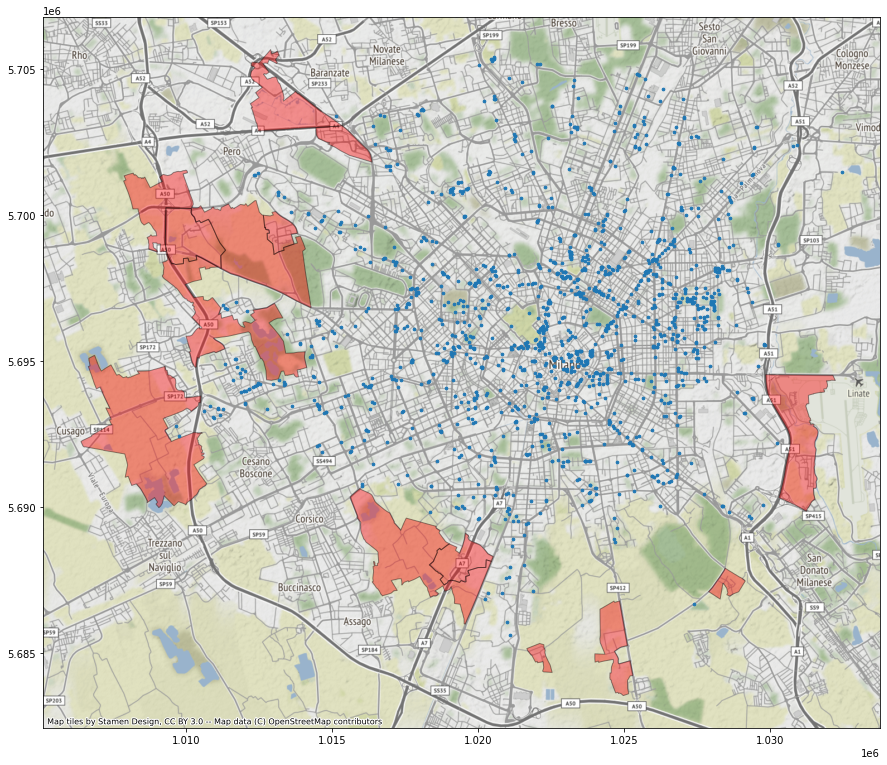

In [ ]:
ax = quartieri_senza_aree.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

5. il nome del quartiere con più aree di sosta;

In [ ]:
groupby_di_comodo = elenco_aree_quartieri.groupby("NIL").count()["geometry"].reset_index()
quartiere_con_piu_aree = groupby_di_comodo[groupby_di_comodo["geometry"] == groupby_di_comodo["geometry"].max()]
quartiere_con_piu_aree

NIL  geometry
17  DUOMO       136

In [ ]:
merge1 = pd.merge(quartieri, quartiere_con_piu_aree, on= "NIL", how= "inner")
merge1.rename(columns={"geometry_x": "geometry"}, inplace= True)


In [ ]:
merge1

ID_NIL    NIL  ...                                           geometry geometry_y
0       1  DUOMO  ...  POLYGON ((9.19482 45.47201, 9.19495 45.47213, ...        136

[1 rows x 10 columns]

6. una mappa di Milano con l'indicazione del quartiere con più aree di sosta;

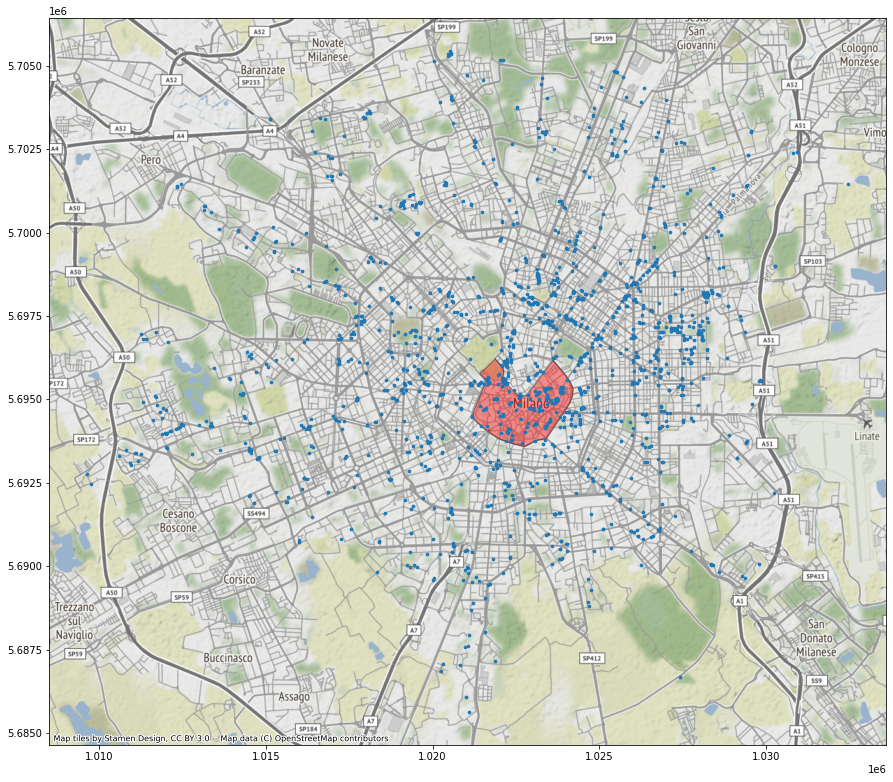

In [ ]:
ax = merge1.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k")
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

7. i nomi dei quartieri con un numero di aree di sosta minori della media

In [ ]:
quar_mino_media = groupby_di_comodo[groupby_di_comodo["geometry"] <  groupby_di_comodo["geometry"].mean()]
quar_mino_media.reset_index()

index                                             NIL  geometry
0       0                                         ADRIANO         5
1       1                                          AFFORI        11
2       4                                          BARONA        14
3       7                                       BOVISASCA         5
4       9                                        BRUZZANO         9
5      11                 CIMIANO - ROTTOLE - Q.RE FELTRE        12
6      13                                        COMASINA         1
7      15                          DE ANGELI - MONTE ROSA        19
8      16                                         DERGANO        12
9      18                                          FARINI         4
10     20                                        GHISOLFA         3
11     21                                     GIAMBELLINO        10
12     22                           GIARDINI P.TA VENEZIA         8
13     24    GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE        10
14     25                                 GRECO - SEGNANO         6
15     28                               LAMBRATE - ORTICA        11
16     34                    MAGGIORE - MUSOCCO - CERTOSA         1
17     35                       MONCUCCO - SAN CRISTOFORO        10
18     36                                       MORIVIONE        17
19     37                                        MUGGIANO         2
20     39                                     ORTOMERCATO         3
21     40                    PADOVA - TURRO - CRESCENZAGO        17
22     42                             PARCO DELLE ABBAZIE         1
23     43                      PARCO FORLANINI - CAVRIANO         4
24     44                                      PARCO NORD         3
25     45                                  PARCO SEMPIONE         3
26     50                      PORTA TICINESE - CONCHETTA        19
27     51                PORTA VIGENTINA - PORTA LODOVICA        12
28     52                                        PORTELLO        18
29     53                                      PTA ROMANA        16
30     55                                            QT 8        14
31     56                                  QUARTO CAGNINO         5
32     57               QUARTO OGGIARO - VIALBA - MUSOCCO        16
33     58                                   QUINTO ROMANO         5
34     59                         ROGOREDO - SANTA GIULIA         3
35     60  RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO         6
36     61                                         ROSERIO         1
37     62                                        SAN SIRO        12
38     64                                    SCALO ROMANA        10
39     66                              STADIO - IPPODROMI         9
40     68           TALIEDO - MORSENCHIO - Q.RE FORLANINI         7
41     69                                         TIBALDI         4
42     70                                       TRE TORRI        14
43     71                               TRIULZO SUPERIORE         1
44     72                    UMBRIA - MOLISE - CALVAIRATE        16
45     73                         VIGENTINO - Q.RE FATIMA        12
46     74             VILLAPIZZONE - CAGNOLA - BOLDINASCO        14
47     75                                      XXII MARZO        19

8. una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
merge2 = pd.merge(quartieri, quar_mino_media, on= "NIL", how= "inner")
merge2

ID_NIL  ... geometry_y
0       48  ...          6
1       67  ...         18
2       81  ...          5
3       84  ...          3
4       76  ...         16
5       61  ...          5
6       60  ...          9
7       62  ...          5
8       57  ...         12
9       82  ...          1
10      43  ...          4
11      13  ...          6
12      58  ...         19
13      78  ...          4
14      83  ...          9
15      66  ...         14
16       8  ...          3
17      46  ...         14
18      71  ...         14
19      32  ...          1
20      27  ...         16
21      30  ...          7
22      59  ...         14
23      37  ...         17
24      38  ...         12
25      29  ...          3
26      54  ...          2
27      44  ...         19
28      28  ...         16
29      74  ...          1
30      19  ...         17
31      41  ...         10
32      70  ...          3
33      85  ...          1
34      23  ...         11
35       5  ...         12
36      36  ...         10
37      26  ...         19
38      18  ...         12
39      79  ...         12
40      24  ...          4
41       3  ...          8
42      80  ...         11
43      45  ...         10
44      72  ...          1
45      49  ...         10
46      33  ...          3
47      17  ...          5

[48 rows x 10 columns]

In [ ]:
merge2.rename(columns={"geometry_x": "geometry"}, inplace= True)

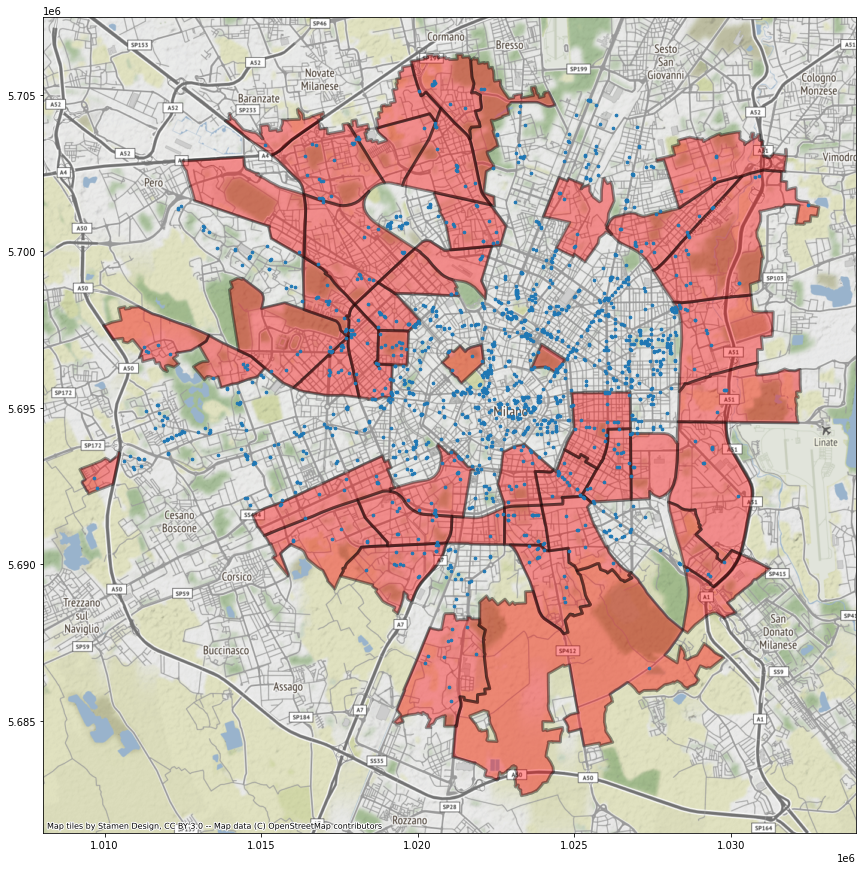

In [ ]:
ax = merge2.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "red", alpha= 0.4, edgecolor= "k", linewidth= 3)
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7)
contextily.add_basemap(ax)

9. una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

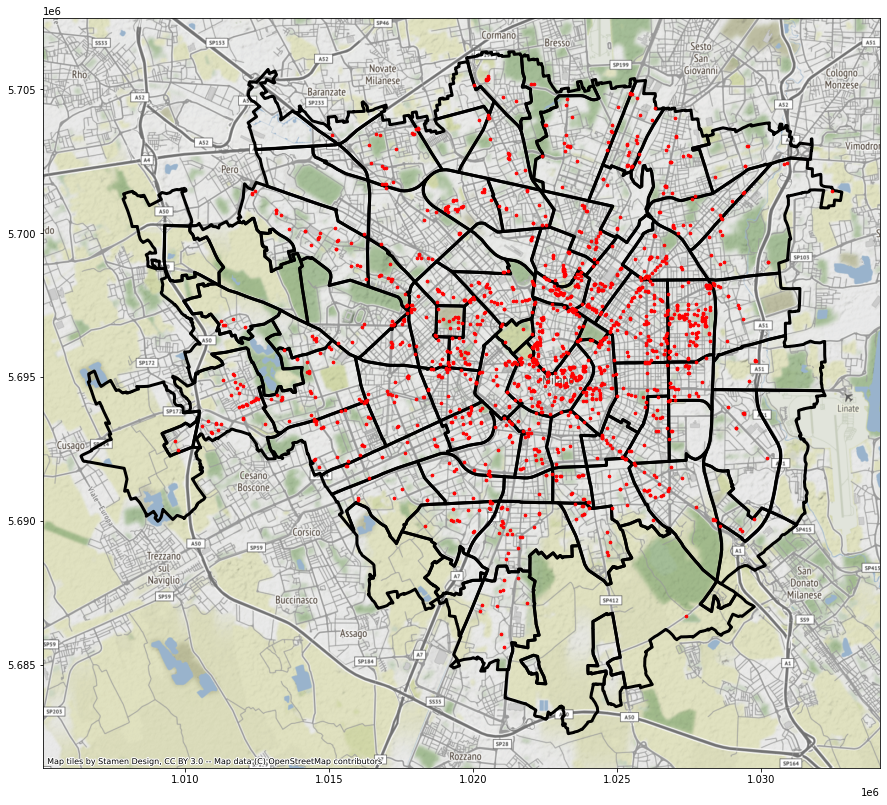

In [ ]:
ax = quartieri.to_crs(epsg=3857).plot(figsize=(15,15), facecolor= "none", edgecolor= "k", linewidth= 3)
aree_sosta.to_crs(epsg=3857).plot(ax=ax, markersize = 7, color="r")
contextily.add_basemap(ax)

10. una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

In [ ]:
merge3 = pd.merge(quartieri, groupby_di_comodo, on= "NIL", how= "inner")
merge3.rename(columns={"geometry_x": "geometry"}, inplace= True)
merge3

ID_NIL  ... geometry_y
0       48  ...          6
1       67  ...         18
2       81  ...          5
3       84  ...          3
4       20  ...         36
..     ...  ...        ...
71      68  ...         36
72       2  ...         70
73      33  ...          3
74      17  ...          5
75      53  ...         27

[76 rows x 10 columns]

In [ ]:
merge3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

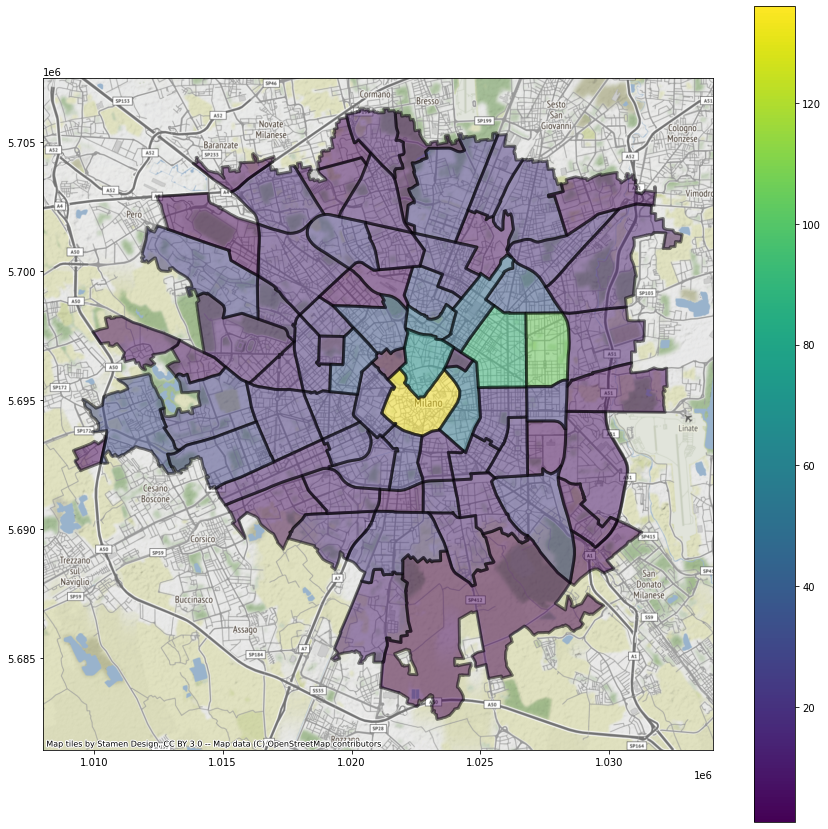

In [ ]:
ax = merge3.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3, column= "geometry_y", legend= True)
contextily.add_basemap(ax)

11. data una via (inserita dall'utente), avere le aree di sosta di quella via

In [ ]:
elenco_aree

id_amat id_via num_civico municipio  ... BARRATO    CAP  SEZIONE  MUNICIPIO
0           2   5339          0         5  ...     NaN  142.0   2066.0        5.0
1           4   1545         21         9  ...     NaN  161.0   1216.0        9.0
2           8   6330         42         7  ...     NaN  153.0   2117.0        7.0
3           9   7165          4         8  ...     NaN  149.0    444.0        8.0
4          10   6660          5         6  ...     NaN  147.0   1032.0        6.0
...       ...    ...        ...       ...  ...     ...    ...      ...        ...
1517     3232   1242         72         9  ...     NaN  158.0   1954.0        9.0
1518     3233   1242         72         9  ...     NaN  158.0   1954.0        9.0
1519     3234   1242         72         9  ...     NaN  158.0   1954.0        9.0
1520     3235   1242         72         9  ...     NaN  158.0   1954.0        9.0
1521     3243   4290         36         5  ...     NaN  139.0   1855.0        4.0

[1522 rows x 20 columns]

In [ ]:
via = input("Inserisci una via: ")

if via in list(elenco_aree.DESCRIZIONE_VIA):
  print(elenco_aree[elenco_aree["DESCRIZIONE_VIA"] == via])
else:
  print("La via da te inserita non è presente all'interno del geodataframe")


Inserisci una via: CANDIANI G.
      id_amat id_via num_civico municipio  ... BARRATO    CAP  SEZIONE  MUNICIPIO
1517     3232   1242         72         9  ...     NaN  158.0   1954.0        9.0
1518     3233   1242         72         9  ...     NaN  158.0   1954.0        9.0
1519     3234   1242         72         9  ...     NaN  158.0   1954.0        9.0
1520     3235   1242         72         9  ...     NaN  158.0   1954.0        9.0

[4 rows x 20 columns]


12. dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

Inserisci il nome di un quartiere: AFFORI


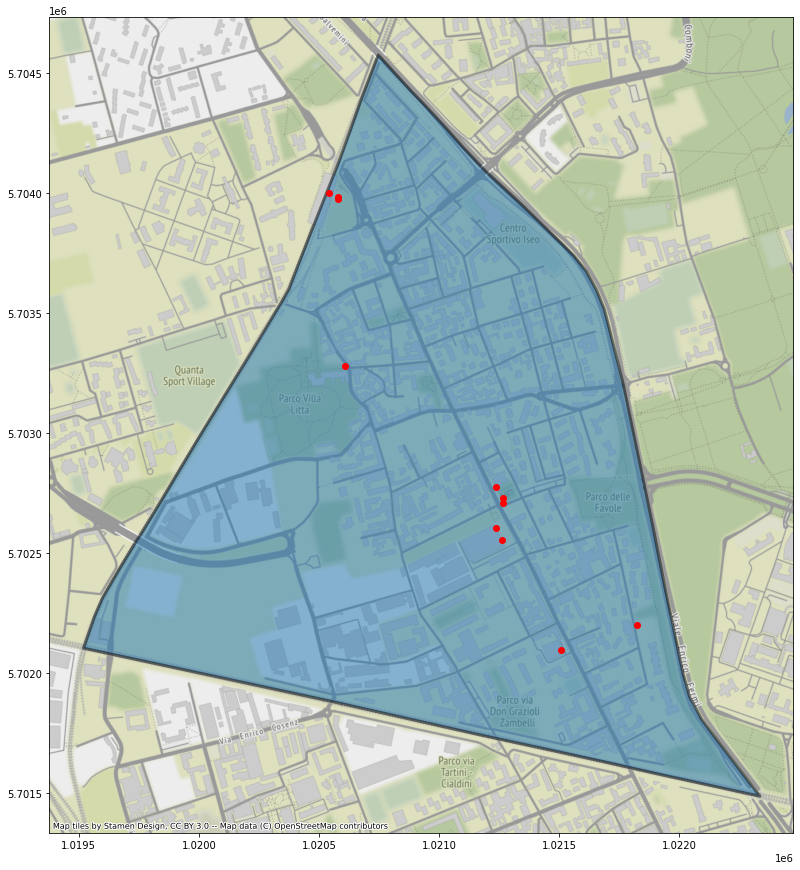

In [ ]:
quartiere_input = input("Inserisci il nome di un quartiere: ")

if quartiere_input in list(quartieri.NIL):

  quartiere= quartieri[quartieri["NIL"] == quartiere_input]

  aree_sosta_quartiere = aree_sosta[aree_sosta.intersects(quartiere.unary_union)]
  aree_sosta_quartiere

  ax = quartiere.to_crs(epsg=3857).plot(figsize=(15,15), alpha= 0.5, edgecolor= "k", linewidth= 3)
  aree_sosta_quartiere.to_crs(epsg=3857).plot(ax=ax, color= "r")
  contextily.add_basemap(ax)
else:
  print("Il quartiere da te inserito non è presente all'inetrnmo del geodataframe")

13. date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;

Inserisci la longitudine: 9.191383
Inserisci la latitudine: 45.464211


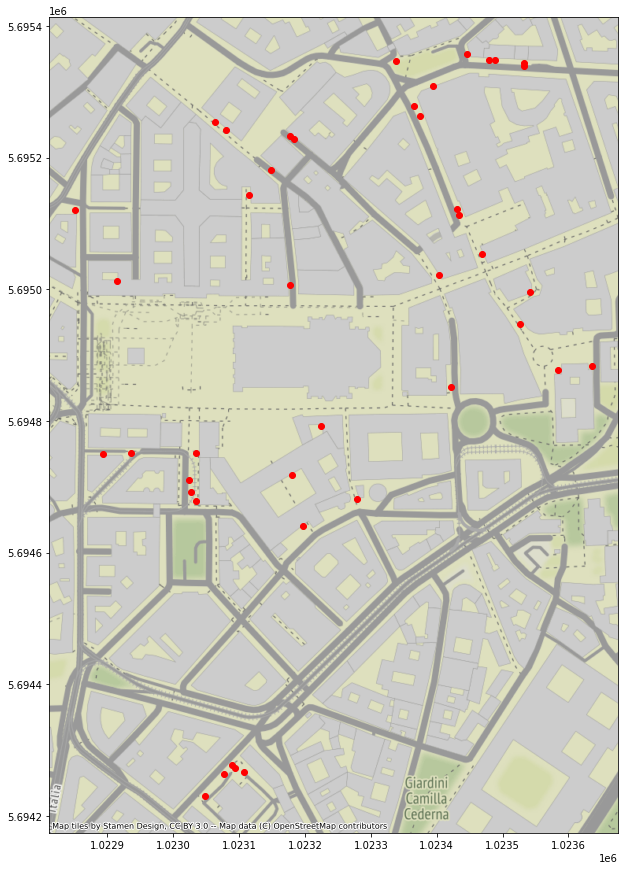

In [ ]:
from shapely.geometry import Point

longitudine = float(input("Inserisci la longitudine: "))
latitudine = float(input("Inserisci la latitudine: "))
#9.191383, 45.464211 (coordinate del duomo)

punto = Point(longitudine, latitudine)
punto

buffer_punto = punto.buffer(0.0044) # 500 gradi in metri sono 0.0044 metri
aree_sosta_meno500 = aree_sosta[aree_sosta.within(buffer_punto)]

ax = aree_sosta_meno500.to_crs(epsg=3857).plot(figsize=(15,15), color= "r")
contextily.add_basemap(ax)
